<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo3_RedesNeuronales/RedesNeuronales_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicacion de las redes neuronales en problemas de regresión

In [18]:
# Ejemplo de regresión con dataset no lineal (Friedman #1)

from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

In [19]:
# Clonar repositorio
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython/
os.chdir("/content/ERAP_CursoPython/Modulo2_Fundamentos_AI")

Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 942, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 942 (delta 200), reused 110 (delta 101), pack-reused 704 (from 2)
Receiving objects: 100% (942/942), 55.01 MiB | 27.04 MiB/s, done.
Resolving deltas: 100% (469/469), done.


## El conjunto de datos sintético Friedman #1,

un clásico para probar métodos de regresión no lineales. Este problema es famoso porque:

La relación entre $X$ e  $y$  es altamente no lineal
La regresión lineal falla al capturar esos efectos, mientras que una red neuronal con capas ocultas sí puede aproximarlos.

$$
y=10sin(π X_1 X_2)+20(X_3−0.5)^2 +10X_4+5X_5 +ε
$$

In [ ]:
# 1. Crear datos
X, y = make_friedman1(n_samples=1000, n_features=10, noise=1.0, random_state=42)

In [ ]:
# 2. Dividir y escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
# 3. Modelo base: regresión lineal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Regresión Lineal - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Regresión Lineal - R2:", r2_score(y_test, y_pred_lr))

Regresión Lineal - MSE: 5.470848131867546
Regresión Lineal - R2: 0.7540809065032895


In [ ]:
# 4. Red neuronal con Keras
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1)  # regresión: una salida
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=0)

# Evaluación
mse_nn, mae_nn = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_nn = model.predict(X_test_scaled).flatten()
print("Red Neuronal - MSE:", mse_nn)
print("Red Neuronal - R2:", r2_score(y_test, y_pred_nn))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Red Neuronal - MSE: 6.352570056915283
Red Neuronal - R2: 0.7144468050554295


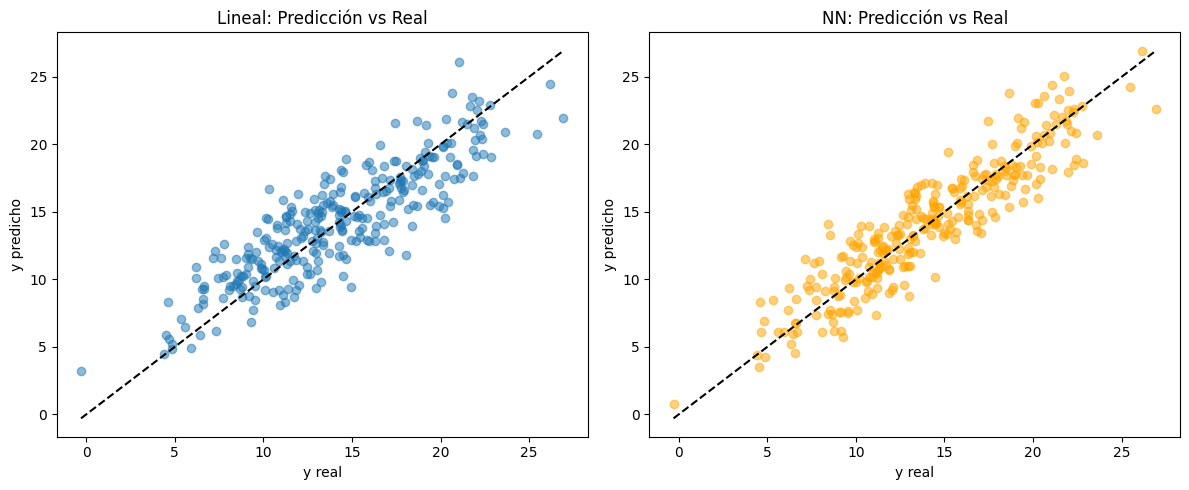

In [ ]:
# 5. Comparación gráfica
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Lineal: Predicción vs Real")
plt.xlabel("y real")
plt.ylabel("y predicho")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_nn, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("NN: Predicción vs Real")
plt.xlabel("y real")
plt.ylabel("y predicho")

plt.tight_layout()
plt.show()

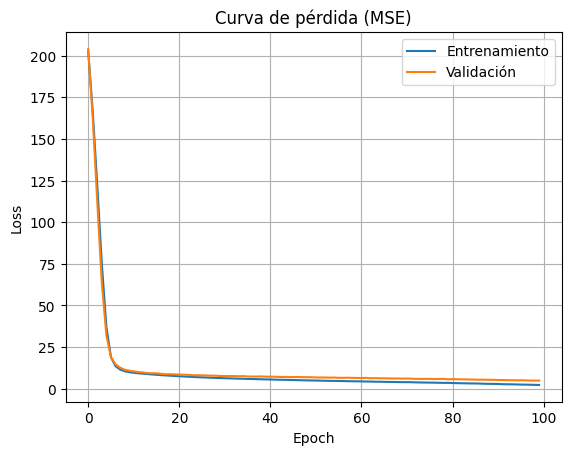

In [ ]:
# 6. Curva de pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title("Curva de pérdida (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### Gráfico de residuos vs valores predichos para la red neuronal

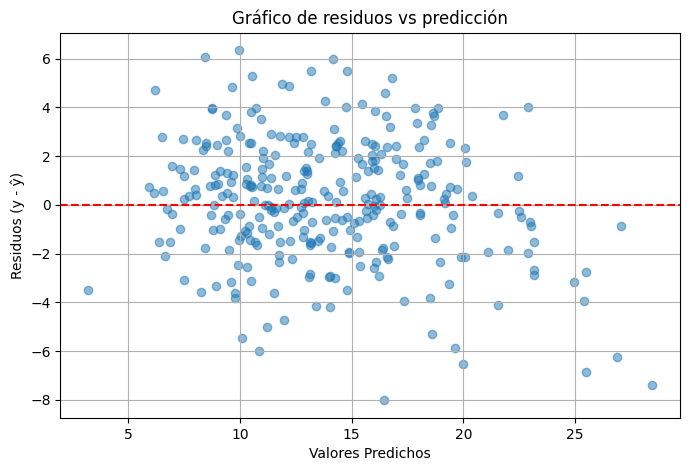

In [ ]:
residuos = y_test - y_pred_nn

plt.figure(figsize=(8,5))
plt.scatter(y_pred_nn, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (y - ŷ)')
plt.title('Gráfico de residuos vs predicción')
plt.grid(True)
plt.show()

### Gráfico de residuos vs valores predichos para la regresión lineal

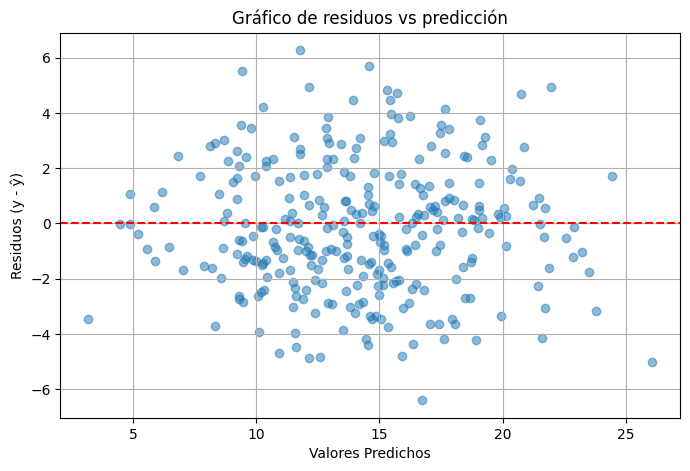

In [ ]:
residuos = y_test - y_pred_lr

plt.figure(figsize=(8,5))
plt.scatter(y_pred_lr, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (y - ŷ)')
plt.title('Gráfico de residuos vs predicción')
plt.grid(True)
plt.show()

# Ahora vamos (nuevamente) a calcular el precio del oro, con base en las otras variables

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [37]:
# 1. Cargar datos

df = pd.read_csv('data/GoldUP.csv')
df

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24
2,01-12-2000,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56
3,01-01-2001,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
4,01-02-2001,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...,...,...
234,01-04-2020,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,01-05-2020,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,01-06-2020,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,01-07-2020,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35


In [38]:
# 2. Preprocesamiento básico
df = df.drop(['Date'], axis=1)
# Separar características y objetivo
y = df['Gold_Price'].values
X = df.drop('Gold_Price', axis=1).values

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Escalado de características
dist_scaler = StandardScaler()
X_train_scaled = dist_scaler.fit_transform(X_train)
X_test_scaled = dist_scaler.transform(X_test)

In [43]:
# 3. Definición del modelo MLP
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(2, activation='relu'),
    Dense(1)  # salida para regresión
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
# 4. Entrenamiento
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=32,
    verbose=0
)

In [45]:
# 5. Evaluación
# Predicciones
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# Métricas
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Train MSE: {mse_train:.3f}, R2: {r2_train:.3f}")
print(f"Test  MSE: {mse_test:.3f}, R2: {r2_test:.3f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Train MSE: 326335328.000, R2: -1.455
Test  MSE: 353174752.000, R2: -1.419


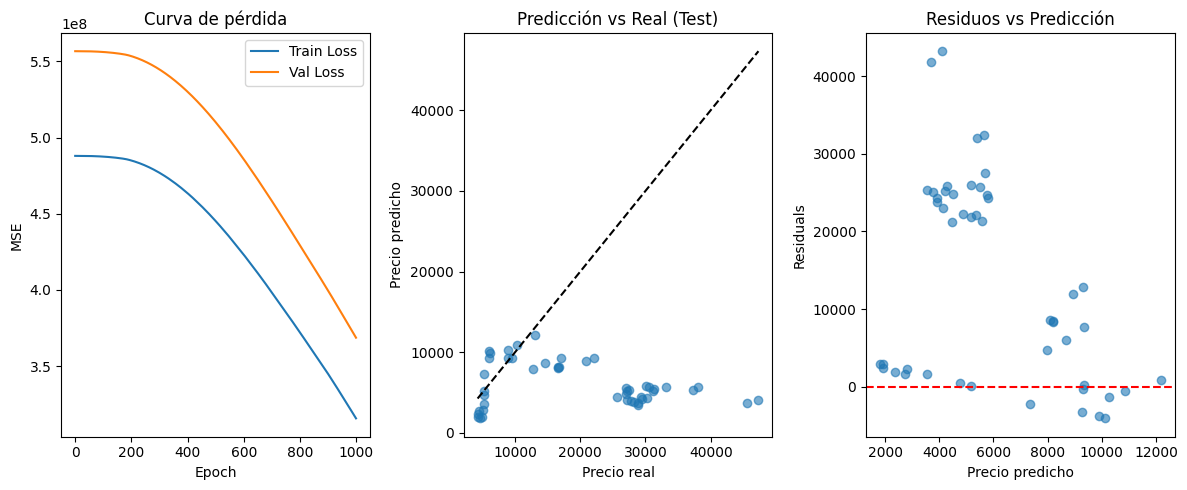

In [46]:
# 6. Gráficos de análisis
plt.figure(figsize=(12, 5))

# 6.1 Curva de pérdida
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Curva de pérdida')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# 6.2 Predicción vs real (test)
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Predicción vs Real (Test)')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')

# 6.3 Residuos vs predicción
residuals = y_test - y_pred_test
plt.subplot(1, 3, 3)
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Predicción')
plt.xlabel('Precio predicho')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


# Busqueda automática de hiperparámetros

In [48]:
!pip install scikeras

In [50]:
!pip install --upgrade scikit-learn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# 1. Cargar y preparar los datos
data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Definir función para construir el modelo (para usar con GridSearchCV)
def build_model(n_hidden=1, n_neurons=30, learning_rate=0.01, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.Input(shape=input_shape))
    for _ in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation="relu"))
    model.add(layers.Dense(1))  # Salida de regresión
    model.compile(
        loss="mse",
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=["mae"]
    )
    return model

# 3. Envolver el modelo para usar con GridSearchCV
keras_reg = KerasRegressor(model=build_model, verbose=0)

# 4. Definir la grilla de hiperparámetros
param_grid = {
    "model__n_hidden": [1, 2],
    "model__n_neurons": [20, 30],
    "model__learning_rate": [0.01, 0.001],
    "batch_size": [32, 64],
    "epochs": [50]
}

# 5. Búsqueda de hiperparámetros
grid_search = GridSearchCV(keras_reg, param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# 6. Evaluación en test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en test: {rmse:.4f}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'